## 1. Importing pandas and creating a DataFrame

In [1]:
import pandas as pd

# Creating a simple DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Miami']
}

df = pd.DataFrame(data)

print(df)

      Name  Age         City
0    Alice   24     New York
1      Bob   27  Los Angeles
2  Charlie   22      Chicago
3    David   32        Miami


## 2. Selecting Data

In [4]:
# Selecting a single column
print(df['Name'])
print("-" * 20)
# Selecting multiple columns
print(df[['Name', 'Age']])
print("-" * 20)
# Selecting rows by index position using `iloc` (integer-location based indexing)
print(df.iloc[0])  # First row
print(df.iloc[1:3])  # Rows 1 and 2 (0-indexed)
print("-" * 20)
# Selecting rows by label using `loc` (label-based indexing)
print(df.loc[0])  # First row (using index label)

0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object
--------------------
      Name  Age
0    Alice   24
1      Bob   27
2  Charlie   22
3    David   32
--------------------
Name       Alice
Age           24
City    New York
Name: 0, dtype: object
      Name  Age         City
1      Bob   27  Los Angeles
2  Charlie   22      Chicago
--------------------
Name       Alice
Age           24
City    New York
Name: 0, dtype: object


## 3. Basic DataFrame Operations

In [7]:
# Basic statistical operations
print(df['Age'].mean())  # Mean of 'Age'
print(df['Age'].sum())  # Sum of 'Age'
print("-"*30)

# Filtering data based on conditions
print(df[df['Age'] > 25])  # Select rows where Age is greater than 25
print("-"*30)

# Adding a new column
df['Salary'] = [50000, 60000, 55000, 65000]
print(df)

26.25
105
------------------------------
    Name  Age         City  Salary
1    Bob   27  Los Angeles   60000
3  David   32        Miami   65000
------------------------------
      Name  Age         City  Salary
0    Alice   24     New York   50000
1      Bob   27  Los Angeles   60000
2  Charlie   22      Chicago   55000
3    David   32        Miami   65000


## 4. Handling Missing Data

In [9]:
# Creating a DataFrame with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', None],
    'Age': [24, None, 22, 32]
}

df2 = pd.DataFrame(data)
print(df2)
print("-" * 30)

# Checking for missing values
print(df2.isnull())
print("-" * 30)

# Dropping rows with missing values
df2_clean = df2.dropna()
print(df2_clean)
print("-" * 30)

# Filling missing values with a default value
df2_filled = df2.fillna({'Name': 'Unknown', 'Age': df2['Age'].mean()})
print(df2_filled)

      Name   Age
0    Alice  24.0
1      Bob   NaN
2  Charlie  22.0
3     None  32.0
------------------------------
    Name    Age
0  False  False
1  False   True
2  False  False
3   True  False
------------------------------
      Name   Age
0    Alice  24.0
2  Charlie  22.0
------------------------------
      Name   Age
0    Alice  24.0
1      Bob  26.0
2  Charlie  22.0
3  Unknown  32.0


## 5. Merging and Concatenating DataFrames

In [10]:
# Creating another DataFrame
data2 = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Country': ['USA', 'USA', 'USA', 'USA']
}

df3 = pd.DataFrame(data2)
print(df3)
print("-" * 30)

# Merging DataFrames on a common column
merged_df = pd.merge(df, df3, on='Name')
print(merged_df)
print("-" * 30)

# Concatenating DataFrames (stacking them vertically)
df4 = pd.concat([df, df3], axis=0)  # Stack vertically
print(df4)
print("-" * 30)

# Concatenating DataFrames (stacking them horizontally)
df4_horiz = pd.concat([df, df3], axis=1)  # Stack horizontally
print(df4_horiz)


      Name Country
0    Alice     USA
1      Bob     USA
2  Charlie     USA
3    David     USA
------------------------------
      Name  Age         City  Salary Country
0    Alice   24     New York   50000     USA
1      Bob   27  Los Angeles   60000     USA
2  Charlie   22      Chicago   55000     USA
3    David   32        Miami   65000     USA
------------------------------
      Name   Age         City   Salary Country
0    Alice  24.0     New York  50000.0     NaN
1      Bob  27.0  Los Angeles  60000.0     NaN
2  Charlie  22.0      Chicago  55000.0     NaN
3    David  32.0        Miami  65000.0     NaN
0    Alice   NaN          NaN      NaN     USA
1      Bob   NaN          NaN      NaN     USA
2  Charlie   NaN          NaN      NaN     USA
3    David   NaN          NaN      NaN     USA
------------------------------
      Name  Age         City  Salary     Name Country
0    Alice   24     New York   50000    Alice     USA
1      Bob   27  Los Angeles   60000      Bob     USA
2 

## 6. Grouping and Aggregating Data

In [14]:
df

,Name,Age,City,Salary
0,Alice,24,New York,50000
1,Bob,27,Los Angeles,60000
2,Charlie,22,Chicago,55000
3,David,32,Miami,65000


In [18]:
df_grouped = df.groupby("City")['Salary'].mean()
df_grouped = df.groupby('City').mean(numeric_only=True)
df.fillna(0, inplace=True)  # Replace NaN with 0
df_grouped_agg = df.groupby('City').agg({'Age': 'mean', 'Salary': 'sum'})
print(df_grouped_agg)

              Age  Salary
City                     
Chicago      22.0   55000
Los Angeles  27.0   60000
Miami        32.0   65000
New York     24.0   50000


## 7. Pivot Tables and Crosstabs

In [20]:
# Creating a pivot table
pivot = df.pivot_table(values='Salary', index='City', aggfunc='mean')
print(pivot)
print("-" * 20)
# Creating a crosstab (useful for categorical data)
crosstab = pd.crosstab(df['City'], df['Age'] > 25)
print(crosstab)

              Salary
City                
Chicago      55000.0
Los Angeles  60000.0
Miami        65000.0
New York     50000.0
--------------------
Age          False  True 
City                     
Chicago          1      0
Los Angeles      0      1
Miami            0      1
New York         1      0


## 8. Time Series Data

In [22]:
# Create a DataFrame with dates
dates = pd.date_range('2025-01-01', periods=5, freq='D')
data = {'Date': dates, 'Temperature': [30, 32, 28, 27, 31]}
df_time = pd.DataFrame(data)

# Set Date as index
df_time.set_index('Date', inplace=True)
print(df_time)
print("-" * 20)

# Resampling time series data (e.g., daily to monthly)
df_resampled = df_time.resample('ME').mean()
print(df_resampled)

            Temperature
Date                   
2025-01-01           30
2025-01-02           32
2025-01-03           28
2025-01-04           27
2025-01-05           31
--------------------
            Temperature
Date                   
2025-01-31         29.6


## 9. Advanced DataFrame Operations

In [23]:
# Apply a custom function to a column
def categorize_age(age):
    if age < 25:
        return 'Young'
    elif age < 30:
        return 'Adult'
    else:
        return 'Mature'

df['AgeCategory'] = df['Age'].apply(categorize_age)
print(df)
print("-" * 20)

# Applying a lambda function
df['SalaryPlusBonus'] = df['Salary'].apply(lambda x: x * 1.1)
print(df)

      Name  Age         City  Salary AgeCategory
0    Alice   24     New York   50000       Young
1      Bob   27  Los Angeles   60000       Adult
2  Charlie   22      Chicago   55000       Young
3    David   32        Miami   65000      Mature
--------------------
      Name  Age         City  Salary AgeCategory  SalaryPlusBonus
0    Alice   24     New York   50000       Young          55000.0
1      Bob   27  Los Angeles   60000       Adult          66000.0
2  Charlie   22      Chicago   55000       Young          60500.0
3    David   32        Miami   65000      Mature          71500.0


## 10. Visualizing Data

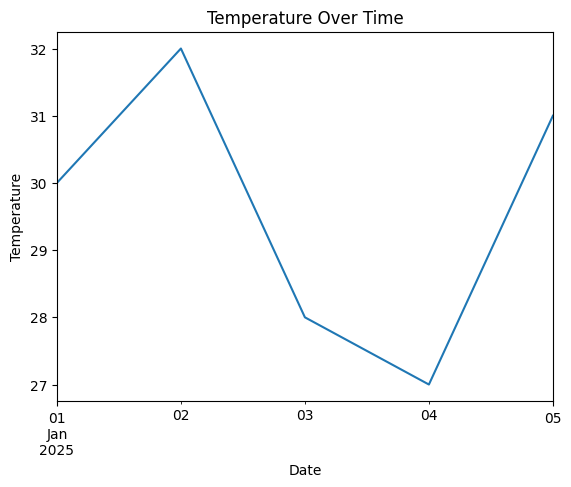

In [24]:
import matplotlib.pyplot as plt

# Plotting a column (Salary) over time
df_time['Temperature'].plot(kind='line', title="Temperature Over Time")
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()